## Variant of the Interactive Race Model that introduces variability in mustop in the form of a normal distribution

In [7]:
import numpy
import random
import matplotlib.pyplot as plt
import pandas

%matplotlib inline

In [13]:
params={'mugo':.1,
        'mustop':.4, 
#        'mustopstrong':.8,
#        'mustopweak': .1,
        'threshold':60,
        'nondecisiongo':50,
        'nondecisionstop':50,
        'inhibitionParam':1, 
        'ssds':[1,50,100,150, 200,250, 300, 350, 400, 450, 500,3000],
        'nreps':1000,
        'maxtime':1000}
#        'proportionweak':.15}

def interactiverace(params):
    stopaccumsave = []
    meanrtgo = numpy.zeros(len(params['ssds']))
    presp = numpy.zeros(len(params['ssds']));
 
    for irep in range(params['nreps']):
        for j,ssd in enumerate(params['ssds']):
            stopsignaldelay = ssd
            goaccumulator = 0
            stopaccumulator = 0
            rtgo = 0
            itime = 0
#            if random.uniform(0,1) < params['proportionweak']:
#                mustop = params['mustopweak']
#                mustopVar = numpy.random.normal()*.008
#            else: 
#                mustop = params['mustopstrong']
#                mustopVar = numpy.random.normal()
#            while mustop<=0:
#                mustop = params['mustop']+numpy.random.normal(loc=0, scale=1) 
#            mustopsave.append(mustop)
            while itime < params['maxtime'] and rtgo == 0: # single trial
                itime = itime + 1
                if itime < stopsignaldelay + params['nondecisionstop']:
                    inhibition = 0
                else:
                    inhibition = params['inhibitionParam']
                    stopaccumulator = stopaccumulator + params['mustop'] + numpy.random.normal(loc=0, scale=1)
                    if stopaccumulator <= 0:
                        stopaccumulator = 0;
                    stopaccumsave.append(stopaccumulator)
                if itime >= params['nondecisiongo']:
                    goaccumulator = goaccumulator + params['mugo'] - inhibition*stopaccumulator + numpy.random.normal(loc=0, scale=1)
                    if goaccumulator <= 0:
                        goaccumulator = 0;
                if goaccumulator > params['threshold']:
                    if rtgo == 0:
                        rtgo = itime;
            meanrtgo[j] += rtgo;
            if rtgo > 0:
                presp[j] += 1;

    for ssd in range(len(params['ssds'])):
        if presp[ssd] > 0:
            meanrtgo[ssd] = meanrtgo[ssd]/presp[ssd];
        presp[ssd] = presp[ssd]/params['nreps'];
    return(meanrtgo,presp,stopaccumsave)

meanrtgo,presp,stopaccumsave=interactiverace(params)
print(meanrtgo)
print(presp)
#print(stopaccumsave)
#print(mustopsave)

[  0.           0.           0.           0.         236.625
 269.94736842 298.20588235 339.25185185 375.50207469 401.60674157
 431.92647059 574.30540827]
[0.    0.    0.    0.    0.008 0.019 0.068 0.135 0.241 0.356 0.476 0.943]


In [53]:
numpy.median(mustopsave)
#mustop = params['mustop']*numpy.random.normal(.6)
#mustop

0.615512880680935

[1, 500, 0, 1]

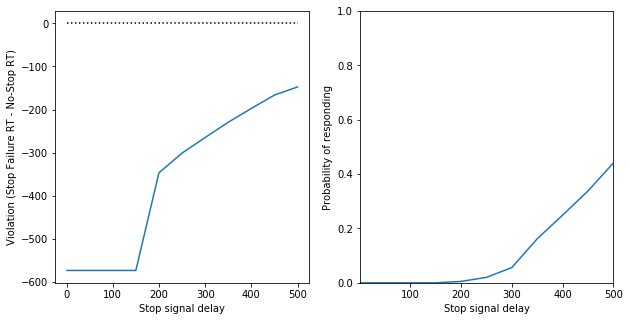

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(params['ssds'][:11],meanrtgo[:11] - meanrtgo[11])
plt.plot([params['ssds'][0],params['ssds'][10]],[0,0],'k:')
plt.xlabel('Stop signal delay')
plt.ylabel('Violation (Stop Failure RT - No-Stop RT)')
plt.subplot(1,2,2)
plt.plot(params['ssds'][:11],presp[:11])
plt.xlabel('Stop signal delay')
plt.ylabel('Probability of responding')
plt.axis([params['ssds'][0],params['ssds'][10],0,1])


[1, 200, 0, 1]

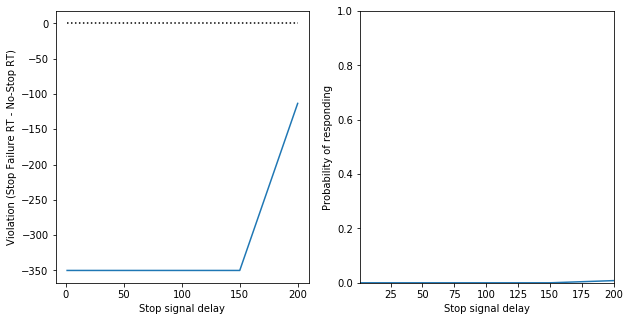

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(params['ssds'][:5],meanrtgo[:5] - 350)
plt.plot([params['ssds'][0],params['ssds'][4]],[0,0],'k:')
plt.xlabel('Stop signal delay')
plt.ylabel('Violation (Stop Failure RT - No-Stop RT)')
plt.subplot(1,2,2)
plt.plot(params['ssds'][:5],presp[:5])
plt.xlabel('Stop signal delay')
plt.ylabel('Probability of responding')
plt.axis([params['ssds'][0],params['ssds'][4],0,1])

In [48]:
numpy.random.normal(loc=0, scale=1)

-0.6605853315403353

In [10]:
meanrtgo[11]

342.5119

In [108]:
print(stopaccumsave)

[0.654533654683521, 0.6103201234723866, 1.0103693655698653, 1.9627222057992946, 1.8355936088825133, 1.7193104232892749, 2.5897431690841106, 2.9726281681770765, 2.7358961334672225, 4.776362044533281, 5.9569934745921875, 6.98477007058967, 6.482707394907806, 7.913374005459081, 8.198342608357411, 11.629226454838633, 12.821833286354192, 13.239388644732912, 13.060638779922296, 16.283924546536742, 19.15800056002839, 18.396261446108863, 16.33001108293535, 16.438581256777294, 16.155026210396844, 17.01137239741765, 17.18692120107347, 18.890031963708577, 20.03662916567637, 20.403953700793934, 22.31471788194353, 22.741588417484035, 22.660329693181477, 23.939482717989076, 23.500924074658887, 25.632928174999744, 25.813993239968827, 26.620523456825854, 28.338482729005985, 29.42281180981297, 27.040160395340965, 28.788899745552463, 28.404865511207397, 30.491419257750206, 29.564937631264186, 29.420099863718416, 30.224715827811547, 30.987963650761557, 33.368736441830194, 35.14792942029928, 34.88625523917

In [104]:
numpy.mean(stopaccumsave)

328.8927756737207

In [105]:
numpy.median(stopaccumsave)

322.3041559590321